In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv("Data\Mall_Customers.csv")




EDA

In [2]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
print(df.describe()
)

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


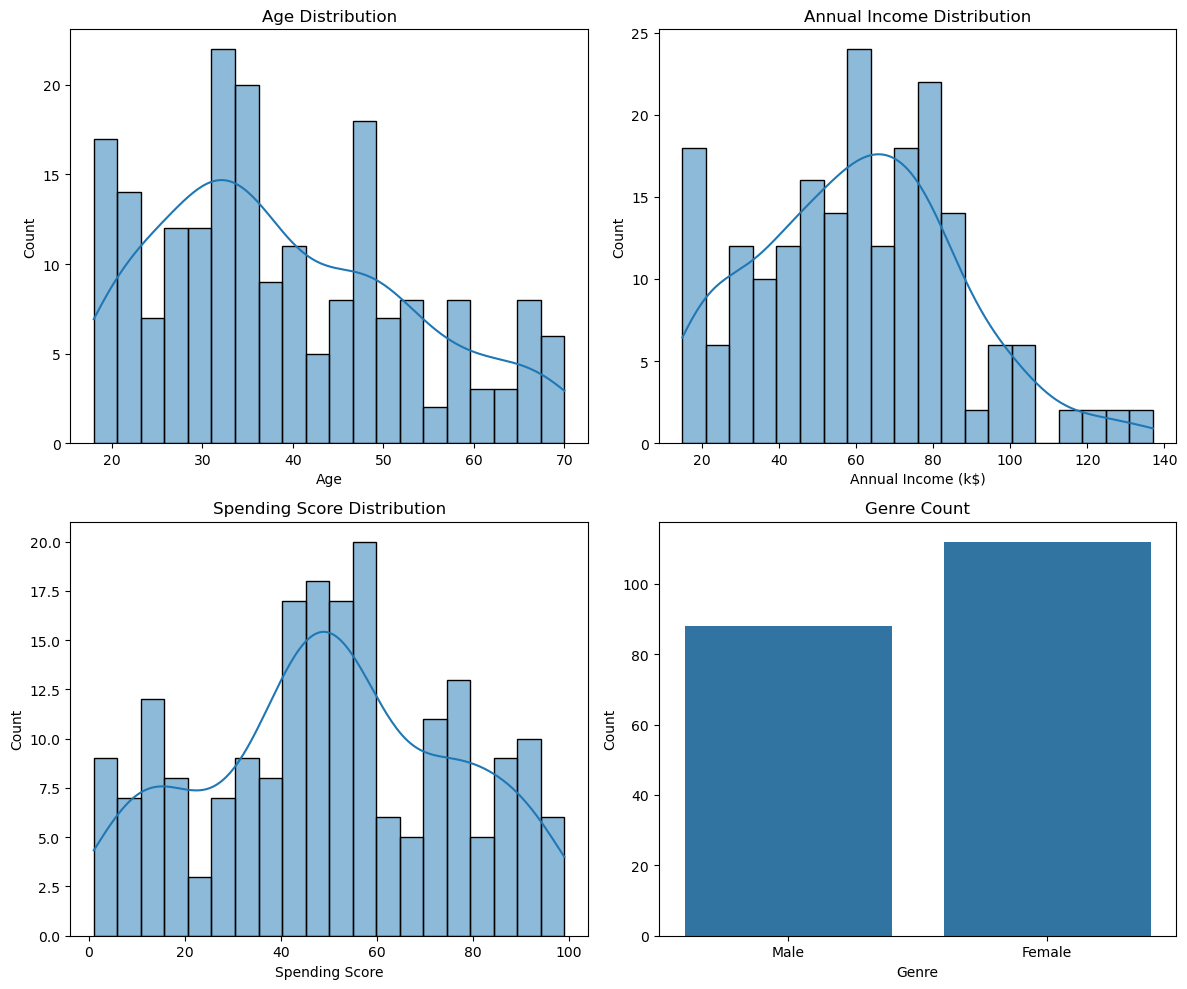

In [8]:
import matplotlib.pyplot as plt   
import seaborn as sns           

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(df['Age'], bins=20, kde=True, ax=axes[0,0])
axes[0,0].set_title("Age Distribution")
axes[0,0].set_xlabel("Age")
axes[0,0].set_ylabel("Count")

sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, ax=axes[0,1])
axes[0,1].set_title("Annual Income Distribution")
axes[0,1].set_xlabel("Annual Income (k$)")
axes[0,1].set_ylabel("Count")

sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, ax=axes[1,0])
axes[1,0].set_title("Spending Score Distribution")
axes[1,0].set_xlabel("Spending Score")
axes[1,0].set_ylabel("Count")

sns.countplot(x='Genre', data=df, ax=axes[1,1])
axes[1,1].set_title("Genre Count")
axes[1,1].set_xlabel("Genre")
axes[1,1].set_ylabel("Count")


plt.tight_layout()
plt.show()


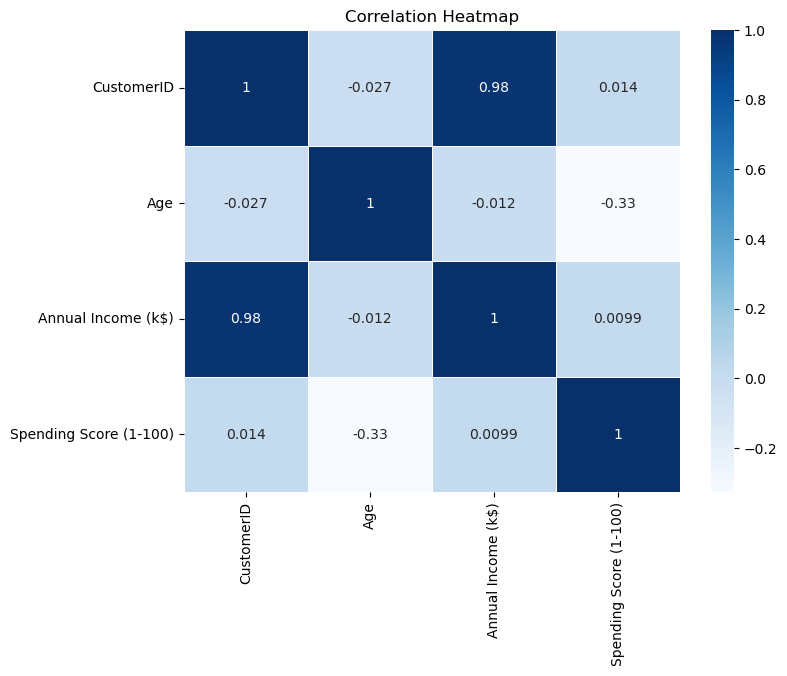

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="Blues", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [10]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

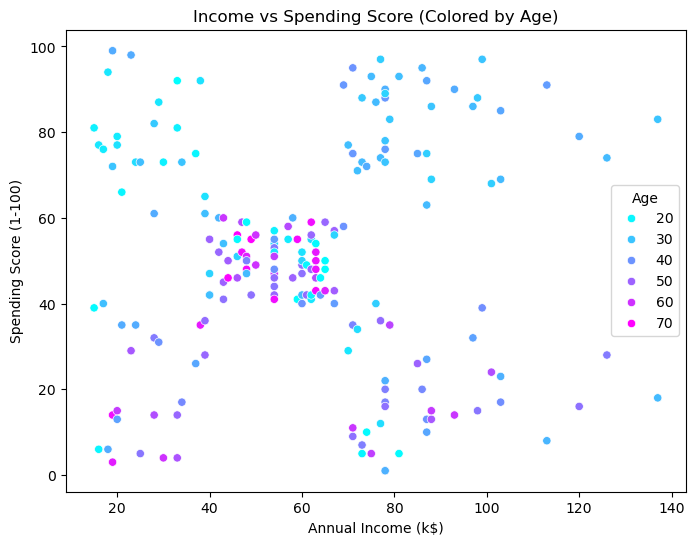

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Age', palette='cool', data=df)
plt.title("Income vs Spending Score (Colored by Age)")
plt.show()


C:\Users\mahmo\AppData\Local\Temp\ipykernel_18132\3110874050.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(X_scaled, labels=["Age", "Annual Income (k$)", "Spending Score (1-100)"])


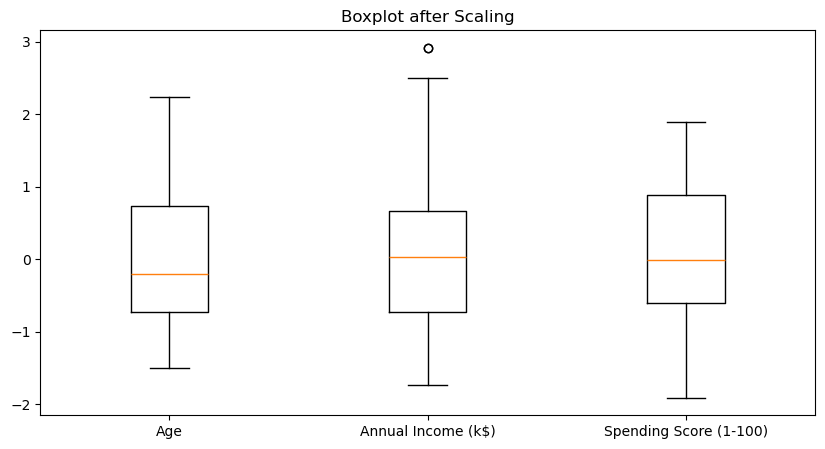

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.boxplot(X_scaled, labels=["Age", "Annual Income (k$)", "Spending Score (1-100)"])
plt.title("Boxplot after Scaling")
plt.show()


In [13]:
import pandas as pd

# Convert X_scaled to DataFrame with column names
X_scaled_df = pd.DataFrame(X_scaled, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

# Show first 5 rows
X_scaled_df

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


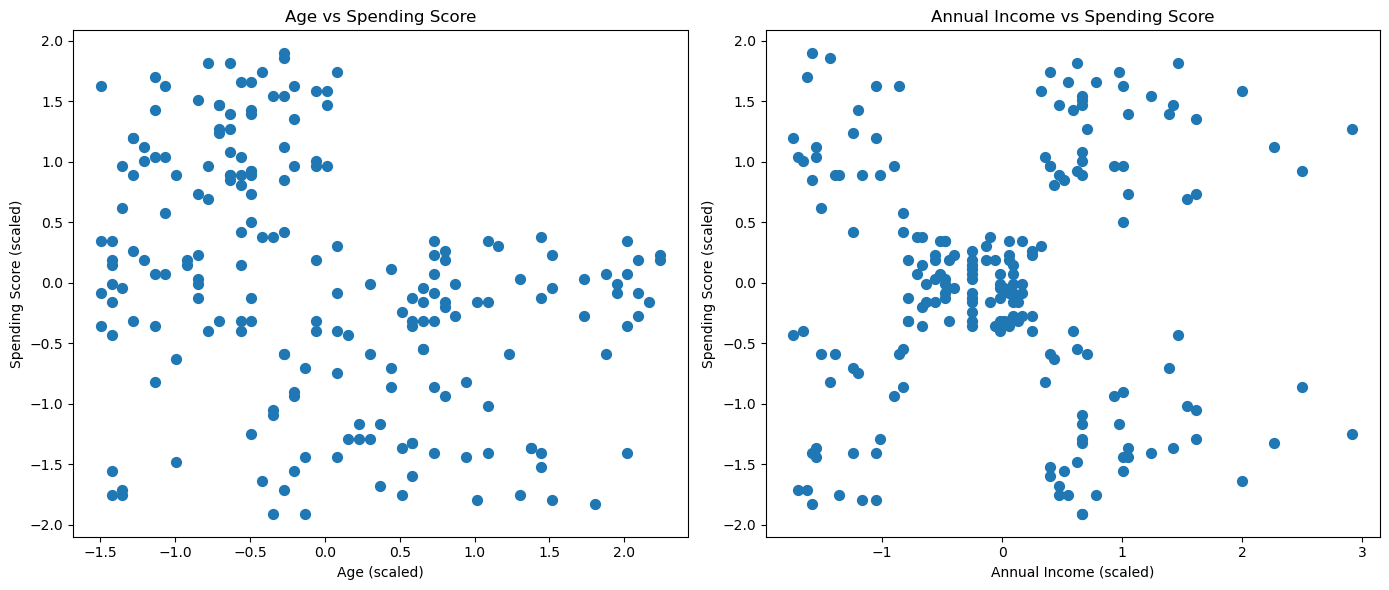

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Scatter: Age vs Spending Score
axes[0].scatter(X_scaled_df['Age'], X_scaled_df['Spending Score (1-100)'], s=50)
axes[0].set_xlabel("Age (scaled)")
axes[0].set_ylabel("Spending Score (scaled)")
axes[0].set_title("Age vs Spending Score")

# Scatter: Annual Income vs Spending Score
axes[1].scatter(X_scaled_df['Annual Income (k$)'], X_scaled_df['Spending Score (1-100)'], s=50)
axes[1].set_xlabel("Annual Income (scaled)")
axes[1].set_ylabel("Spending Score (scaled)")
axes[1].set_title("Annual Income vs Spending Score")

plt.tight_layout()
plt.show()


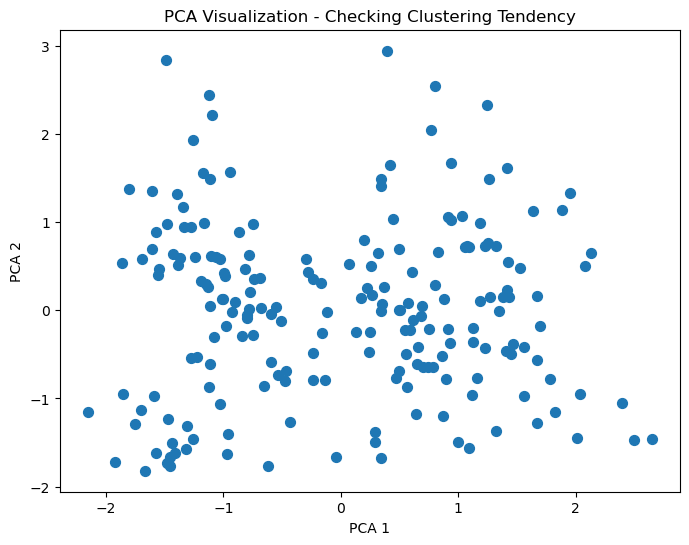

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_df)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], s=50)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA Visualization - Checking Clustering Tendency")
plt.show()



In [16]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 11):  
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X_scaled_df)   
    wcss.append(kmeans.inertia_)   




c:\Users\mahmo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mahmo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mahmo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mahmo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

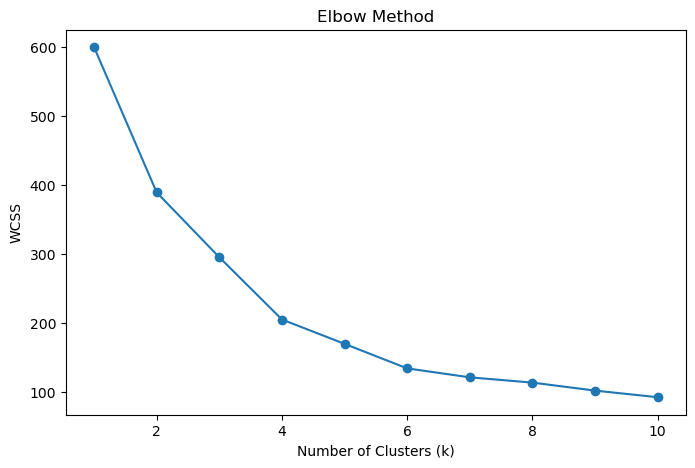

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1) fit KMeans with k = 6
k = 6
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled_df)   # X_scaled_df is the scaled DataFrame

# 2) compute silhouette score
sil_score = silhouette_score(X_scaled_df, labels)
print("Silhouette (k=6):", sil_score)


Silhouette (k=6): 0.4284167762892593


c:\Users\mahmo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [19]:
df['Cluster'] = labels

df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,4
2,3,Female,20,16,6,5
3,4,Female,23,16,77,4
4,5,Female,31,17,40,5
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,2
197,198,Male,32,126,74,3
198,199,Male,32,137,18,2


In [20]:
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

print(cluster_summary)


               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        56.333333           54.266667               49.066667
1        26.794872           57.102564               48.128205
2        41.939394           88.939394               16.969697
3        32.692308           86.538462               82.128205
4        25.000000           25.260870               77.608696
5        45.523810           26.285714               19.380952


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

plt.scatter(df['Annual Income (k$)'], 
            df['Spending Score (1-100)'], 
            c=df['Cluster'], cmap='rainbow')

plt.title("Customer Segments (KMeans Clusters)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()


KeyError: 'Cluster'

<Figure size 800x600 with 0 Axes>

In [23]:
# Define mapping dictionary
cluster_names = {
    0: "Mature Standard",
    1: "Young Standard",
    2: "Careful Rich",
    3: "VIPs",
    4: "Bargain Lovers",
    5: "Low Value"
}

# Apply mapping to create new column
df["Customer Segment"] = df["Cluster"].map(cluster_names)

# Show sample
print(df[["CustomerID", "Cluster", "Customer Segment"]].head(10))


   CustomerID  Cluster Customer Segment
0           1        4   Bargain Lovers
1           2        4   Bargain Lovers
2           3        5        Low Value
3           4        4   Bargain Lovers
4           5        5        Low Value
5           6        4   Bargain Lovers
6           7        5        Low Value
7           8        4   Bargain Lovers
8           9        5        Low Value
9          10        4   Bargain Lovers


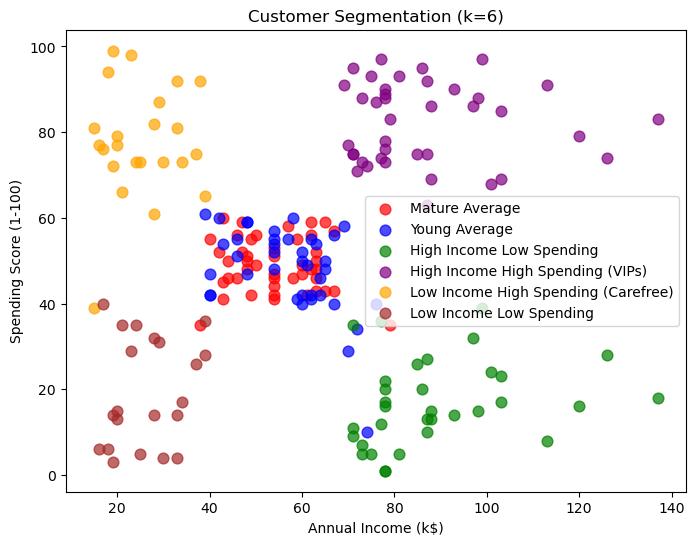

In [ ]:
import matplotlib.pyplot as plt

cluster_labels = {
    0: "Mature Average",
    1: "Young Average",
    2: "High Income Low Spending",
    3: "High Income High Spending (VIPs)",
    4: "Low Income High Spending (Carefree)",
    5: "Low Income Low Spending"
}

df["Cluster_Label"] = df["Cluster"].map(cluster_labels)

plt.figure(figsize=(8,6))
for label, color in zip(cluster_labels.values(), ["red","blue","green","purple","orange","brown"]):
    subset = df[df["Cluster_Label"] == label]
    plt.scatter(subset["Annual Income (k$)"], subset["Spending Score (1-100)"], 
                label=label, c=color, s=60, alpha=0.7)

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation (k=6)")
plt.legend()
plt.show()


C:\Users\mahmo\AppData\Local\Temp\ipykernel_18132\880916922.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Customer Segment', data=df, palette='Set2')


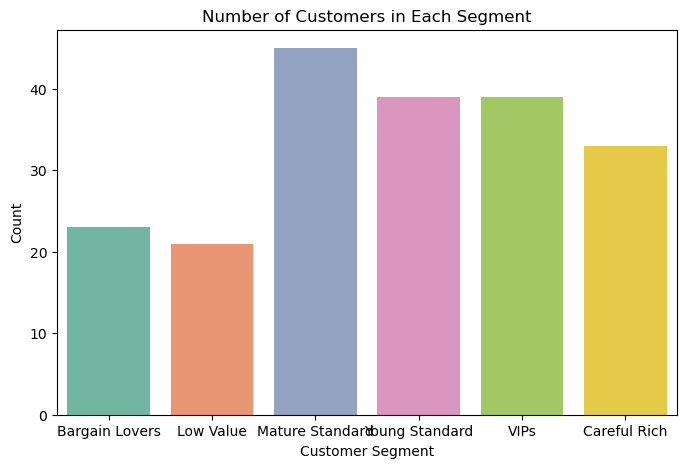

In [25]:



plt.figure(figsize=(8,5))
sns.countplot(x='Customer Segment', data=df, palette='Set2')
plt.title("Number of Customers in Each Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Count")
plt.show()



In [ ]:
df = df.drop(columns=["Cluster", "Cluster_Label"], errors="ignore")



Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Customer Segment'],
      dtype='object')


In [30]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Customer Segment
0,1,Male,19,15,39,Bargain Lovers
1,2,Male,21,15,81,Bargain Lovers
2,3,Female,20,16,6,Low Value
3,4,Female,23,16,77,Bargain Lovers
4,5,Female,31,17,40,Low Value
...,...,...,...,...,...,...
195,196,Female,35,120,79,VIPs
196,197,Female,45,126,28,Careful Rich
197,198,Male,32,126,74,VIPs
198,199,Male,32,137,18,Careful Rich


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create subplot layout: 2 rows × 2 columns
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        "Distribution of Customer Segments",
        "Income vs Spending",
        "Age Distribution by Segment",
        "Interactive Income vs Spending"
    )
)

# 1. Distribution (Bar chart)
segment_counts = df["Customer Segment"].value_counts()
fig.add_trace(
    go.Bar(x=segment_counts.index, y=segment_counts.values, marker=dict(color="teal")),
    row=1, col=1
)

# 2. Scatter: Income vs Spending
fig.add_trace(
    go.Scatter(
        x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"],
        mode="markers", marker=dict(color=df["Customer Segment"].astype("category").cat.codes, colorscale="Viridis"),
        text=df["Customer Segment"]
    ),
    row=1, col=2
)

# 3. Boxplot: Age distribution
fig.add_trace(
    go.Box(x=df["Customer Segment"], y=df["Age"], boxmean=True, marker=dict(color="orange")),
    row=2, col=1
)

# 4. Interactive Scatter (bubble plot)
fig.add_trace(
    go.Scatter(
        x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"],
        mode="markers",
        marker=dict(size=df["Age"], color=df["Customer Segment"].astype("category").cat.codes, colorscale="Plasma", showscale=True),
        text=df["Customer Segment"]
    ),
    row=2, col=2
)

# Layout styling
fig.update_layout(
    height=900, width=1200,
    title_text="Customer Segmentation Dashboard",
    showlegend=False
)

fig.show()


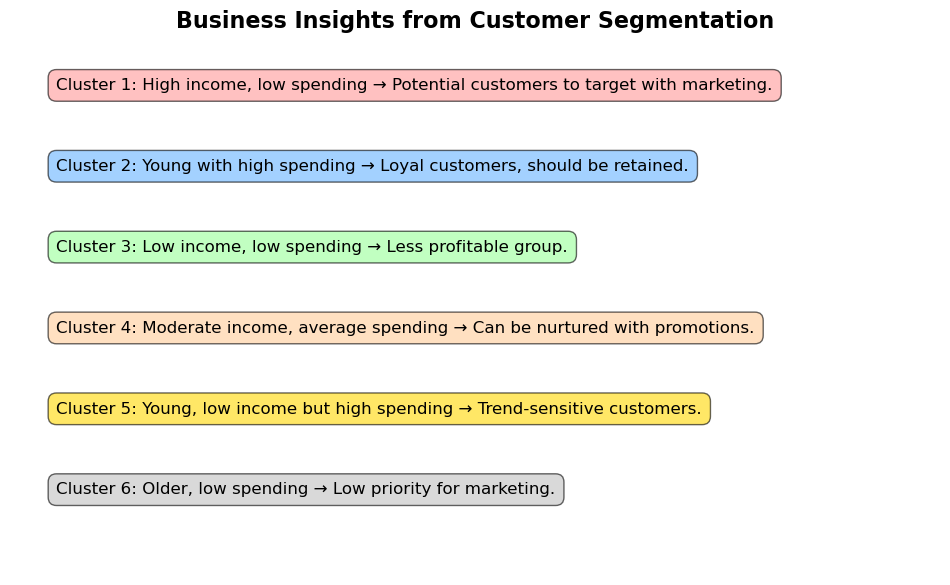

In [12]:

insights = {
    "Cluster 1": "High income, low spending → Potential customers to target with marketing.",
    "Cluster 2": "Young with high spending → Loyal customers, should be retained.",
    "Cluster 3": "Low income, low spending → Less profitable group.",
    "Cluster 4": "Moderate income, average spending → Can be nurtured with promotions.",
    "Cluster 5": "Young, low income but high spending → Trend-sensitive customers.",
    "Cluster 6": "Older, low spending → Low priority for marketing."
}


colors = ["#FF9999", "#66B3FF", "#99FF99", "#FFCC99", "#FFD700", "#C0C0C0"]


plt.figure(figsize=(12, 7))
for i, (cluster, text) in enumerate(insights.items()):
    plt.text(
        0.05, 
        0.9 - i*0.15, 
        f"{cluster}: {text}", 
        fontsize=12, 
        bbox=dict(facecolor=colors[i], alpha=0.6, boxstyle="round,pad=0.5")
    )

plt.axis("off")
plt.title("Business Insights from Customer Segmentation", fontsize=16, fontweight="bold")
plt.show()
